<a href="https://colab.research.google.com/github/Neetika23/Machine-Learning/blob/master/EDA_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import io
iris = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

In [4]:
# How many datapoints and features are there
print (iris.shape)

(150, 6)


In [5]:
print (iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [6]:
del iris['Id']

In [7]:
print (iris.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [8]:
print(iris.shape)

(150, 5)


In [9]:
# How many species types are there?
# It is a balanced datasets as every class have same value
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

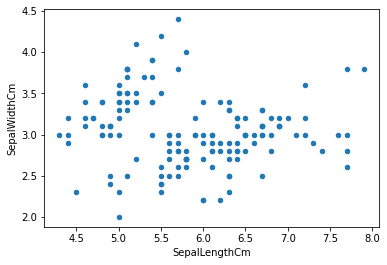

In [10]:
iris.plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm');
plt.show()

# This plot only tells that the sepal_length varies between 4 to 8 and sepal_width varies between 2 to 4.5

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


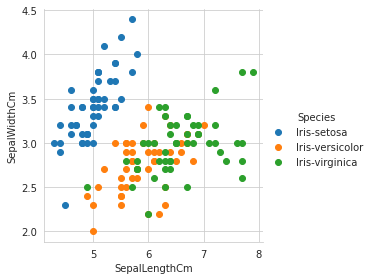

In [11]:
# Now lets differentiate each point according to the class it belongs to with diff colors.

# Set a white grid in background
sns.set_style("whitegrid");
# Color point according to species 
sns.FacetGrid(iris, hue = 'Species', size = 4) \
.map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm') \
.add_legend();
plt.show()

**Observations:**
1. Using sepal length and sepal width, Setosa can be distinguished by drawing just a line. (Linearly-separable)
2. Separating Versicolor and virginica is harder to distinguish. (Non-linear)

**3D Scatter plot**


In [12]:
# https://plotly.com/python/3d-scatter-plots/
# Humans cannot visualize 4D, 5D, nD space.
# Humans need to use somehacks for visualizing 4d, 5d plot. This can be donw using pairplots.

**Pair Plots**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


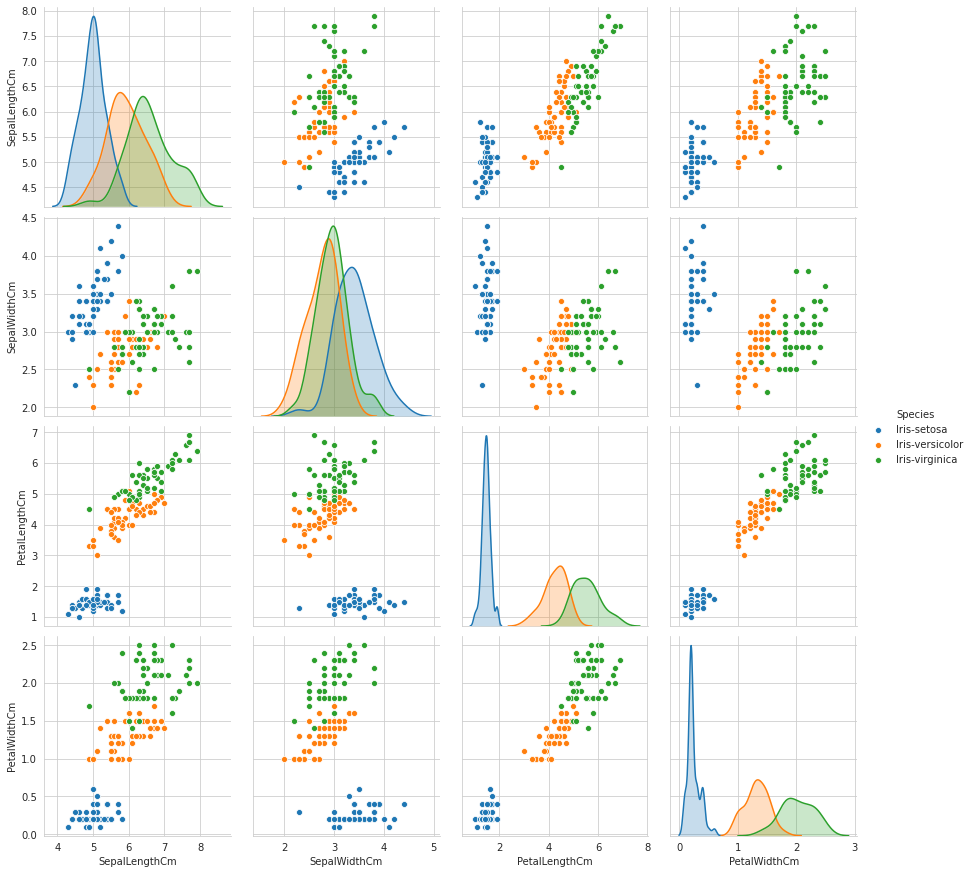

In [13]:
# We have 4 features in this example, so these can be plotted in the pair of 2.
# So there can be 4C2 combinations here i.e. 6 combinations (Sl, Sw) (Sl, Pl) (Sl, Pw) (Sw, Pl) (Sw, pW) (pL, Pw)
plt.close();
sns.set_style('whitegrid');
sns.pairplot(iris, hue = 'Species', size = 3)
plt.show()

# Instead of visualizing 4d plot which we cannot, we can plot 6 2d plots to get to know about 4d visuals.

In [14]:
# Using these pairplots, we can easily identify the class of the flower using if else condition.

**Limitations of pairplot**:
Here we have 4 dim data, what if we have 10 features (10C2 plot) thses are many many plots. So pairplot are decent when dim is less but with higher dim it will not help. For this we will have PCA and t-SNE.

**Histogram, PDF, CDF**

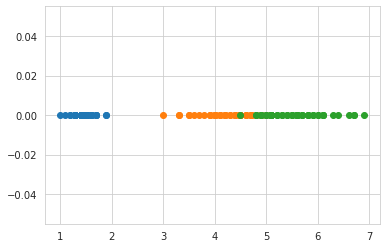

In [15]:
# So what about if data is 1D, lets see how to plot them.

import numpy as np

# Creating seperate dataframe for Setosa and other two classes.
iris_setosa = iris.loc[iris["Species"] == "Iris-setosa"];
iris_virginica = iris.loc[iris["Species"] == "Iris-virginica"];
iris_versicolor = iris.loc[iris["Species"] == "Iris-versicolor"];

# Plotting the dataframe
# X axis: petal length, y axis: zero (nothing)
plt.plot(iris_setosa["PetalLengthCm"],np.zeros_like(iris_setosa["PetalLengthCm"]),'o')
plt.plot(iris_versicolor["PetalLengthCm"], np.zeros_like(iris_versicolor["PetalLengthCm"]),'o')
plt.plot(iris_virginica["PetalLengthCm"], np.zeros_like(iris_virginica["PetalLengthCm"]),'o')
plt.show()

# 1D scatter plot is very hard to read, as there is so much overlapping. One way to improve this is breaking region into smaller buckets 
# For eg, setosa is between 1 and 2 so we can break down into intervals.
# Here x axis could be the petal length and y axis is the count of points between the particular points. (using histogram)
# Histogram makes far more sense than 1D plot

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


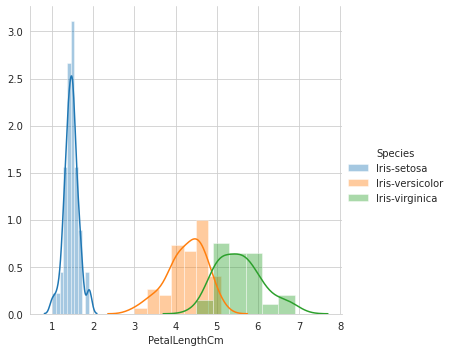

In [16]:
# Distplot - distribution plot (it shows the distribution of petal length)
sns.FacetGrid(iris,hue = "Species", size = 5) \
.map(sns.distplot, "PetalLengthCm") \
.add_legend();
plt.show();

# These smooth lines in the graph are Probability Density Fn (PDF)
# PDF is smoothed form of histogram

# It can be seen if PL <= 2 -> Setosa
# Now the hard problem is what to do for versicolor and virginica (histogram and pdfs are overlapping)
# If u write like -> If PL > 2 and PL <= 5.5 -> Versicolor there will be some overlapped points.
# If PL > 2 and PL <= 4.7 (choosing mid)
# At 5 we can see that there are more virginica and less versicolor, so preference can be given to virginica (green).

# This is also called the density plot. It is telling about the density of regions in x axis.
# PDFs and histogram are much useful when you have one feature.

**Univariate Analysis**: 
As the name same, it is analysis using one variable.
Imagine we have a question, which of these 4 variables is useful to distinguish among the given classes. This can be answered PDFs or Histograms.
Firstly draw histogram for all 4 features, above one is of petal length.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


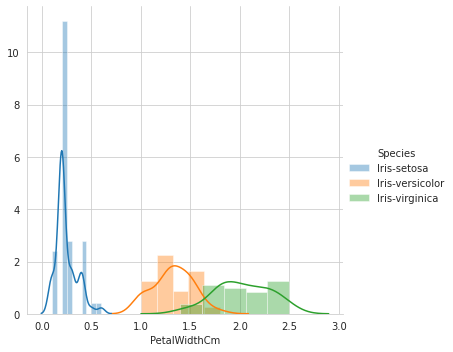

In [17]:
sns.FacetGrid(iris,hue = "Species", size = 5) \
.map(sns.distplot, "PetalWidthCm") \
.add_legend();
plt.show();

There is small overlap btween setosa and versicolor

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


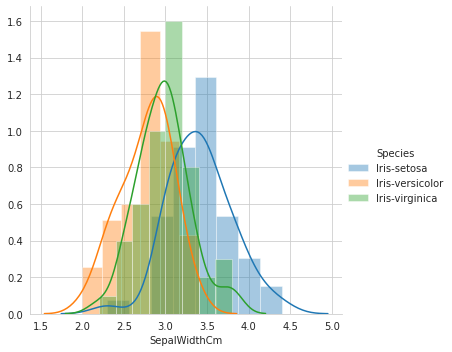

In [18]:
sns.FacetGrid(iris,hue = "Species", size = 5) \
.map(sns.distplot, "SepalWidthCm") \
.add_legend();
plt.show();

# Really bad (lot of overlapping)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


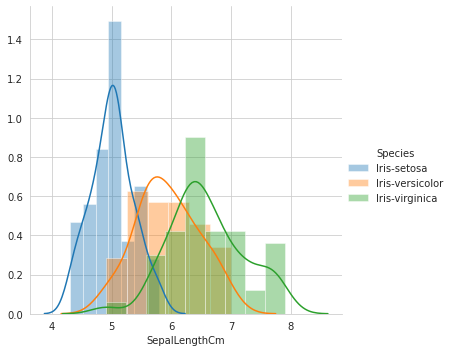

In [19]:
sns.FacetGrid(iris,hue = "Species", size = 5) \
.map(sns.distplot, "SepalLengthCm") \
.add_legend();
plt.show();

# Massive overlap

For selecting 2 features we can use pairplots or histogram.

**Conclusion:** Petal length is slightly better than petal width and these both are significantly better than sepal length and sepal width.

## CDF : Cummulative Distribution Function

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


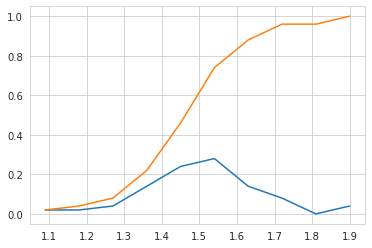

In [20]:
# Blue line : CDF and Orange line: CDF
# x-axis: petal length(Setosa) and y-axis: probability.
# So what CDF tells? Lets have an eg, There are 0.82 (82%) of setosa flowers that has petal length <= 1.6. So its telling what percentage of flowers
# have value corresponding to x-axis value.
# PDF can be seen as already seen by building histogram and then smoothing it.
# Lets see how CDF is built.

# Plotting PDF and CDF for petal length.
counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf) # Numpy cummulative sum
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


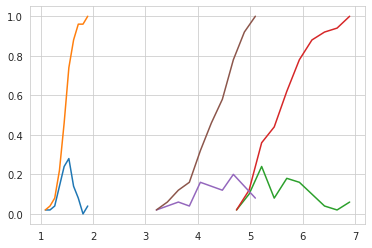

In [21]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

In [22]:
# It can be seen from the above plot that 95% of the versicolor flower have value = 5 and since the versicolor and virginica are
# overlapping 5% may get wrong and same for virginica, 10% may get wrong but 90% is correct.

## Mean, Variance and Standard Deviation

In [23]:
# Mean is denoted by (mu) = (x1+x2+x3....+xn)/n  where, x is data and n is total data points.
print("Means:")
print(np.mean(iris_setosa["PetalLengthCm"]))
print(np.mean(iris_versicolor["PetalLengthCm"]))
print(np.mean(iris_virginica["PetalLengthCm"]))

# By seeing the means, it can be said that setosa have small petal length while virginica and versicolor have larger petal lengths.
# Setosa petal lengths lie between 1 and 2 and its mean is 1.464.
# If there is any datapoint that lies far away from the other observations, it is called an outlier.
# As there are 50 datapoints for setosa, and let someone entered the 51th value as suppose 50 mistakinly, then this mistake will 
# affect the mean too. The below lie output shows, how this 50 value of petal length affected the mean and output came out to be 2.41
# which lies outside the setosa range (1 to 2).

print(np.mean(np.append(iris_setosa["PetalLengthCm"],50))) # Appending the first 50 data points with the value 50 to find the result mean.

# Mean tells about the central tendency (tells avg petal length for each class).

# Spread tells, how widely a class is spread in the graph (PDF graph). It is basically the width of the tower like structure formed i.e
# PDF lines.
# Virginica spread > Versicolor > Setosa

# How to find spread?
# Spread is typically called variance. It tells how far is mean from other points. It cane be +ve or -ve.
# Variance = 1/n [Summation(i = 0 to n)(xi - mean)^2]
# It tells what is the avg square distance of each point from mean.

# Square root (Variance) = Standard Deviation
# It tells what is the avg deviation of points from the mean value. Std small, spread small and std big, spread big

print("\nStds:")
print(np.std(iris_setosa["PetalLengthCm"]))
print(np.std(iris_versicolor["PetalLengthCm"]))
print(np.std(iris_virginica["PetalLengthCm"]))

# From the values of std it can be seen that setosa has much less spread. Majority of the points lie between 1.464-0.17 and 1.464+0.17.
# And same for other classes.

# The problem with mean, var and std is that only one outlier can corrupt the results.

Means:
1.464
4.26
5.552
2.4156862745098038

Stds:
0.17176728442867115
0.4651881339845204
0.5463478745268441


## Median

In [24]:
# Are there something equivalent to mean,std and var that does not corrupt due to outlier?
# Mean has Median.

print("Medians:")
print(np.median(iris_setosa["PetalLengthCm"]))
print(np.median(np.append(iris_setosa["PetalLengthCm"],50)))
print(np.median(iris_versicolor["PetalLengthCm"]))
print(np.median(iris_virginica["PetalLengthCm"]))

# It can be seen that median with and without oulier remains very similar.

# Lets see how is median computed?
# Let x = {1, 1.2, 1.1, 2.1, 1.8, 1.6, 1.2}
# Sort these values. 
# x = {1, 1.1, 1.2, 1.2, 1.6, 1.8, 2.1}
# Pick the middle value = 1.2
# Median(x) = 1.2

# Another ex: let x = {1, 1.2, 1.1, 2.1, 1.8, 1.6, 1.2, 1.8}
# Sorted: x = {1, 1.1, 1.2, 1.2, 1.6, 1.8, 1.8, 2.1}
# finding middle in case of even entries: central no. is somewhere between 1.2 and 1.6, so to find middle value just take simple mean
# of these two : 1.2 + 1.6 / 2 = 1.4
# Median = 1.4.

Medians:
1.5
1.5
4.35
5.55


## Percentile and Quantile

In [25]:
# Percentile tells where do you lie 
# Let x is from 1 to 100 and median(x) = mean(50,51)
# 50th percentile of x = sorted(x[50])
# 10th percentile = sorted(x[10])
# So basically percile tells, what percentage of value is less than and greater than that particular value.
# 50th percentile is median and 25th, 50th, 75th and 100th percentile are quantiles.

print("Qunatiles:")
print(np.percentile(iris_setosa["PetalLengthCm"],np.arange(0,100,25))) #0 to 100 with the gap of 25.
print(np.percentile(iris_versicolor["PetalLengthCm"],np.arange(0,100,25)))
print(np.percentile(iris_virginica["PetalLengthCm"],np.arange(0,100,25)))

print("\n90th Percentile:")
print(np.percentile(iris_setosa["PetalLengthCm"],90)) #0 to 100 with the gap of 25.
print(np.percentile(iris_versicolor["PetalLengthCm"],90))
print(np.percentile(iris_virginica["PetalLengthCm"],90))

# So why 90th percentile is imp? 
# Suppose you have the datapoints(the delivery days) of 10k amazon orders. In these prob 95th and 99th percentile is imp, let there values
# be 4 days and 5.6 days. These number tells a lot about customer satisfaction. It says that 99% of orders were delivered in 5.6 days from 
# the time of placing to the time of delivery. And we can also see that 95% of orders were delivered within 4 days but 5% didnt got there 
# order on time, so we need to mange that thing.


Qunatiles:
[1.    1.4   1.5   1.575]
[3.   4.   4.35 4.6 ]
[4.5   5.1   5.55  5.875]

90th Percentile:
1.7
4.8
6.3100000000000005


## Inter Quartile Range(IQR) and Median Absolute Deviation(MAD)

In [26]:
# Given a bunch of observations(x) and the median, so |xi - med| is the deviation, and then we take the med(|xi-med|) {from i = 1 to n}
from statsmodels import robust
print("Median Absolute Deviation:")
print(robust.mad(iris_setosa["PetalLengthCm"]))
print(robust.mad(iris_versicolor["PetalLengthCm"]))
print(robust.mad(iris_virginica["PetalLengthCm"]))

# MAD is the idea equivalent to std-dev.

# Lets take an example for IQR, if we take the difference between 75th and 25th percentile (0.175 in this case) then it says that 50% of 
# data lies in this range.

Median Absolute Deviation:
0.14826022185056031
0.5189107764769602
0.6671709983275211


## Box-plot with whiskers

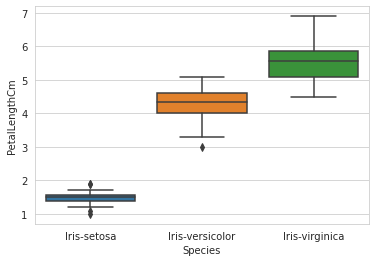

In [27]:
# By looking at the Histogram we cannot find where is the 25th percentile value in case of Setosa (or others). Histograms are good to
# know about the density of class but still it doesnt tell about the percentiles.
# No doubt, CDF can tell about what percentile of values lies below or above an particular value, but are there any diiferent plots to do so
# Yes, we can use boxplot

# Horizontal width of the box has no imp but vertical width is imp (the horizontal line in the given plot is telling about the 50th percentile)

sns.boxplot(x = 'Species', y = 'PetalLengthCm', data=iris)
plt.show()

# Lets take the conditions like if Pl>2 and Pl<5 then versicolor and if Pl>=5 then virginica
# but we can see that at Pl=5 there are 25 percentile of virginica (25% percentage of points for virginica less than 5, so we had 25% of 
# virginica classified as versicolor), this is an error (25% error). This kind of error cannot be deduced from PDFs so this is one case
# how boxplot is useful.

# What are these line below and above boxes. These are called whiskers. There is no std way on drawing whiskers. One way of drawing them is 
# using min and max.
# But seaborn doesnot consider min and max concept. It says that I will take 1.5*IQR (IQR is the vertical width of the box plot as it
# is telling about the range). Seaborn uses it own ways, but one such way is 1.5*IQR. Whiskers are drwan in such a way that most of the 
# points lie within the whiskers.
# Box plot width has 50% of the datapoints.
# Boxplot is nothing, it just take mean, median and quantile and put it in the form of plot.

## Violin Plots

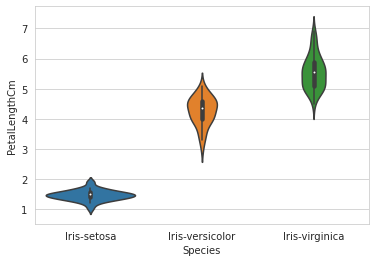

In [28]:
# Combination of Histogram, PDFs with Box plot is known as violin plots.
sns.violinplot(x='Species', y='PetalLengthCm',data=iris,size=9)
plt.show()

# The thick black part is the boxplot and the white dot is the 50th percentile, top and bottom part are whiskers.
# Violinplot plots the probability density function (smooth histograms) to its side (the colorful thick part curves)

## Summarizing Plots, Univariate, Bivariate and Multivariate analysis

In [ ]:
# Taking one variable at a time and analysing it (for eg we took petal length for all our plots above) is Univariate analysis.
# Pairplots,Scatterplots are bivariate as we are looking at two variables for analysis.
# Taking more than two variables for analysis, for eg. 3d scatterplots
# Machine Learning is a multivariate analysis. Because usually there are more than two features in the datasets.

## Multivariate Probability Density, Contour Plot

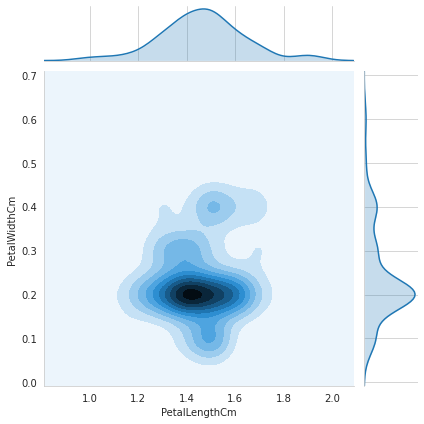

In [31]:
# We have seen the 1d histogram (1d densiy plot)
# Is there something like 2d density plot or nD density plot?
sns.jointplot(x = "PetalLengthCm", y= "PetalWidthCm", data=iris_setosa, kind="kde")
plt.show()

# In the below plot, you can see that as we go far away from the mid point(dark blue color) the points decreases. Its like a hill 
# on the plate (axes). Imagining the same in the 2d plot, the height of the hill is high at the dark blue spot and the height of the hill
# is less on the outer blue color.
# This kind of plot is called Contour Probability-Density Plot.
# Every point on a particular circle has the same height.
# The curves on the top and right side is the univariate distribution of petal length and petalwidth in case of setose, and these two 
# univariate combined to form a 2d plot(contour plot).
# These are multivariate density plots.
# 1D density is PDF
# 2D density is Contour density.
# 3D are harder to visualize